# 📊 Ukázka grafů vytvořených v matplotlibu

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline 
import matplotlib as mpl
mpl.rcParams['figure.dpi']=150

V tomto notebooku si ukážeme, jak využít teoretické znalosti pro tvorbu kvalitního grafu. Využijeme k tomu dataset s teplotami, který jsme vytvořili v minulém cvičení. Pojďme se na něj podívat.

In [3]:
df = pd.read_csv('data/results.csv', delimiter=';')
df.head()

,year,month,day,min temperature,max temperature,avg temperature
0,1971,1,1,-14.7,-8.8,-11.8
1,1971,2,1,-1.2,2.4,0.4
2,1971,3,1,-9.3,-4.8,-6.3
3,1971,4,1,0.7,11.9,7.5
4,1971,5,1,0.0,5.9,2.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18600 entries, 0 to 18599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             18600 non-null  int64  
 1   month            18600 non-null  int64  
 2   day              18600 non-null  int64  
 3   min temperature  18263 non-null  float64
 4   max temperature  18263 non-null  float64
 5   avg temperature  18263 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 872.0 KB


Vidíme, že dataset obsahuje minimální, maximální a průměrnou teplotu pro každý den od 1. 1. 1971 do 31. 12. 2020. Co bychom mohli zkusit vizualizovat?

## ☝️ Vývoj minimální a maximální teploty
Na takovou vizualizaci se bude hodit spojnicový graf (line chart). Jelikož máme obrovský počet dat, vybereme si z nich jen podmnožinu, ať je vizualizace přehledná. Budeme tedy vizualizovat jen vývoj teploty v průběhu listopadu 2004.

In [5]:
# notice the use of dropna, we don't want to include missing values in our visualizations
filtered = df[(df.year == 2004) & (df.month == 11)].dropna()
print(filtered.shape)
filtered.head()

(30, 6)


,year,month,day,min temperature,max temperature,avg temperature
406,2004,11,1,4.6,12.6,9.5
1006,2004,11,2,9.7,11.8,10.8
1606,2004,11,3,10.5,14.9,12.6
2206,2004,11,4,12.5,14.9,13.3
2806,2004,11,5,6.2,13.1,8.8


Data vypadají v pořádku, tak pojďme na vizualizaci.
### 🤮 Pokus 1

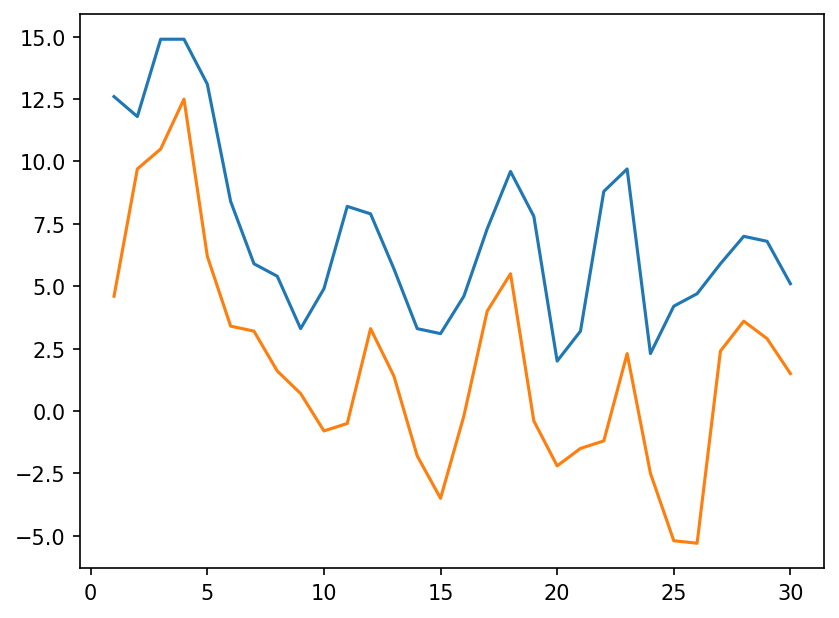

In [6]:
fig, ax = plt.subplots()
ax.plot(filtered['day'], filtered['max temperature'])
ax.plot(filtered['day'], filtered['min temperature']);

Viualizace sice vykresluje správě data, ale určitě není ideální. Co je na ní špatného? 

### 😐 Pokus 2

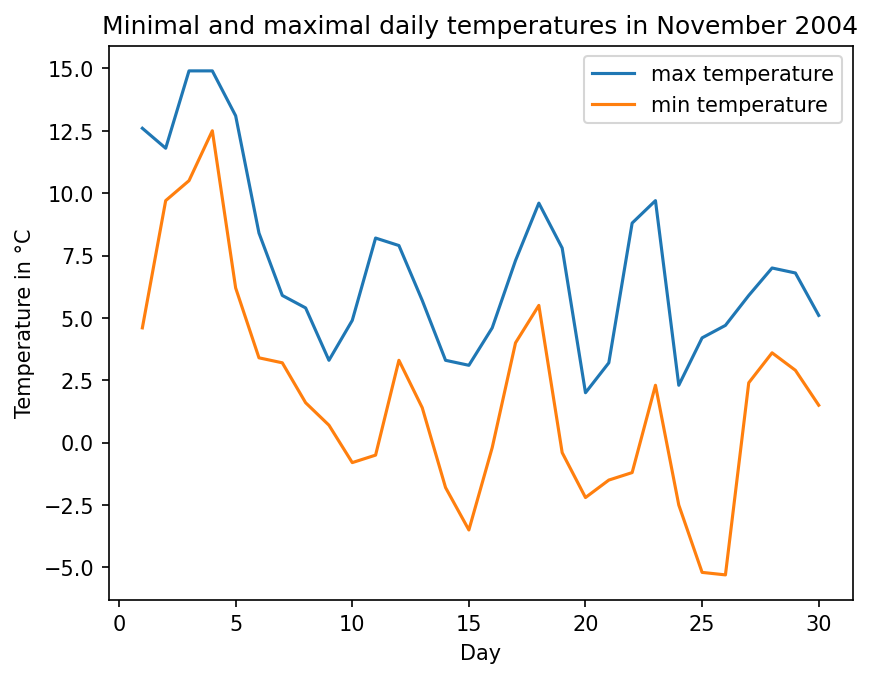

In [7]:
fig, ax = plt.subplots()
ax.plot(filtered['day'], filtered['max temperature'], label='max temperature')
ax.plot(filtered['day'], filtered['min temperature'], label='min temperature')

ax.set_ylabel('Temperature in °C')
ax.set_xlabel('Day')

ax.set_title('Minimal and maximal daily temperatures in November 2004')
ax.legend();

Toto už je mnohem lepší. Může to ale být ještě lepší? Zkusme si s tím trochu pohrát. 


### 😍 Pokus 3

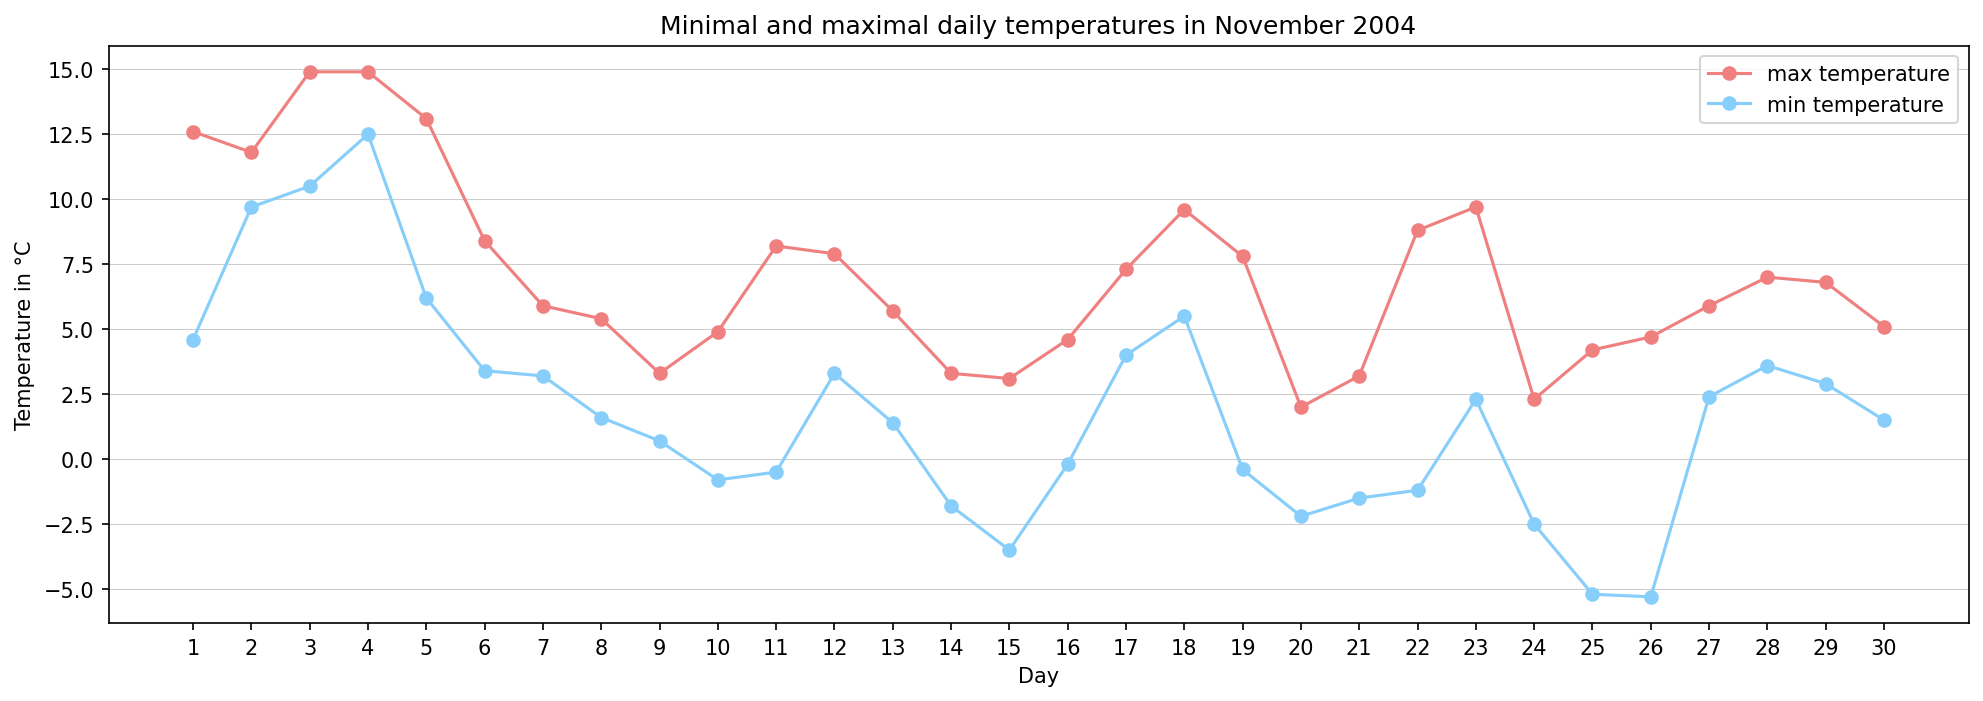

In [8]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(filtered['day'], filtered['max temperature'], 'o-', color='lightcoral', label='max temperature')
ax.plot(filtered['day'], filtered['min temperature'], 'o-', color='lightskyblue', label='min temperature')

fmt=ticker.FixedLocator(filtered['day']) 
ax.xaxis.set_major_locator(fmt)

ax.grid(axis='y', color='black', alpha=.2, linewidth=.5)

ax.set_ylabel('Temperature in °C')
ax.set_xlabel('Day')

ax.set_title('Minimal and maximal daily temperatures in November 2004')
ax.legend();

### 😍 Pokus 3 - popisky

Ještě jsme si neukázali, jak do grafu vkládat **popisky**. Pojďme to zkusit.

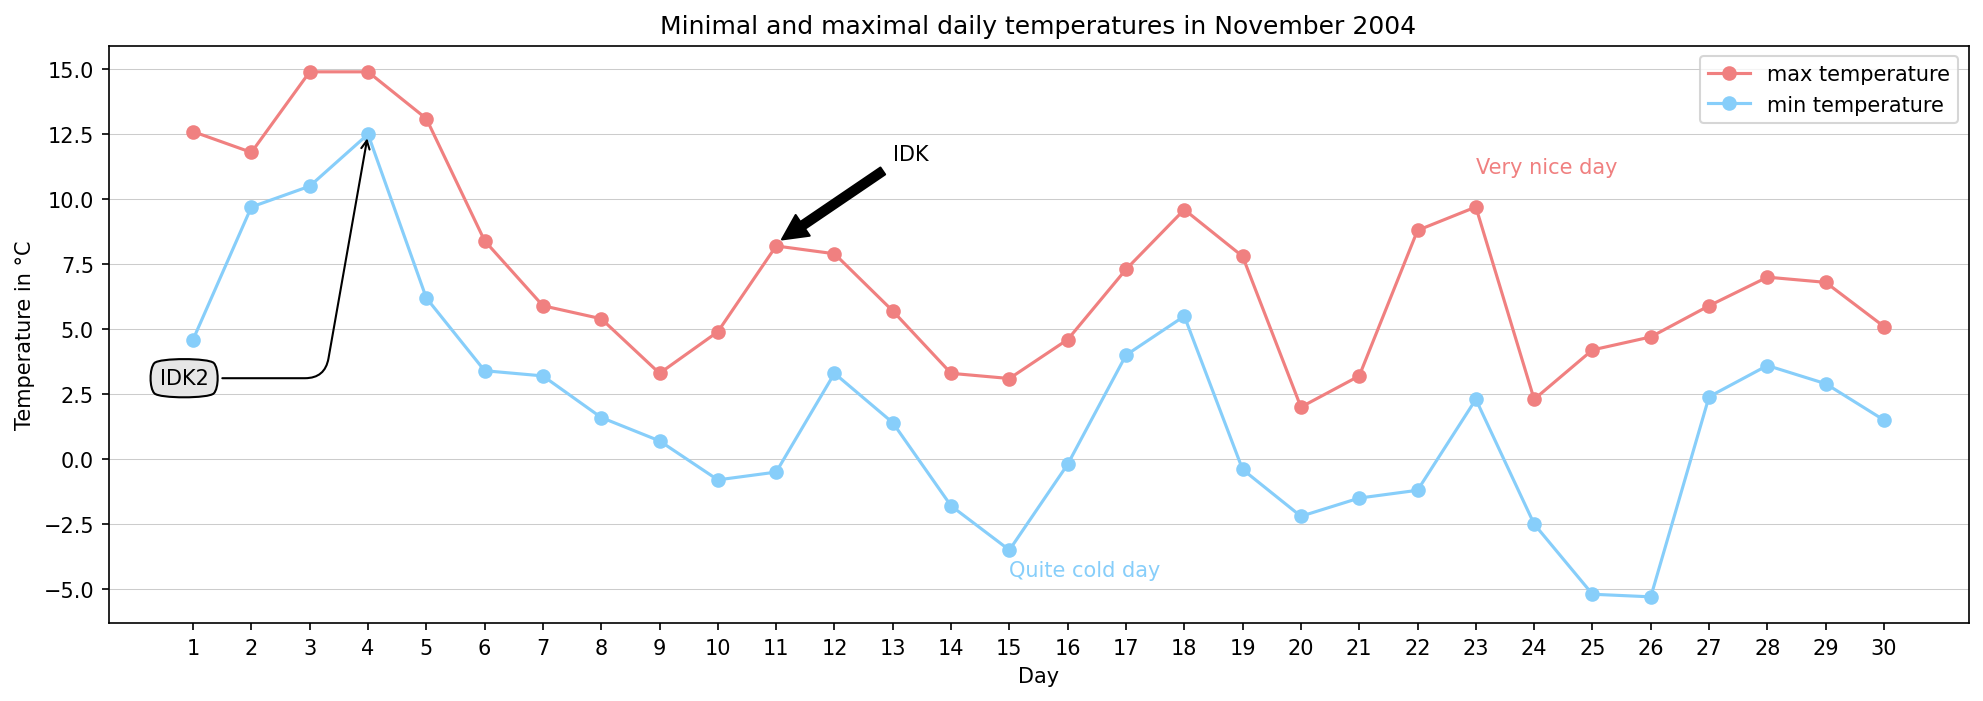

In [9]:
fig, ax = plt.subplots(figsize=(16,5))
ax.plot(filtered['day'], filtered['max temperature'], 'o-', color='lightcoral', label='max temperature')
ax.plot(filtered['day'], filtered['min temperature'], 'o-', color='lightskyblue', label='min temperature')

# add labels to the plot
ax.text(15, -4.5, "Quite cold day", size=10, color='lightskyblue')
ax.text(23, 11, "Very nice day", size=10, color='lightcoral')

# arrows and annotations
# styled by arrowprops dictionary
ax.annotate('IDK', xy=(11, 8.3), xytext=(13, 11.5), arrowprops=dict(facecolor='black', shrink=0.05))
ax.annotate('IDK2', xy=(4, 12.5),  xycoords='data',
            xytext=(-100, -120), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=80,rad=20"))

fmt=ticker.FixedLocator(filtered['day']) 
ax.xaxis.set_major_locator(fmt)

ax.grid(axis='y', color='black', alpha=.2, linewidth=.5)

ax.set_ylabel('Temperature in °C')
ax.set_xlabel('Day')

ax.set_title('Minimal and maximal daily temperatures in November 2004')
ax.legend();

Pokud vás stylizování šipek a popisků zajímá více, můžete se podívat na příklady z [Matplotlib galerie](https://matplotlib.org/stable/gallery/index.html#text-labels-and-annotations).

## ☝️ Porovnání maximální a minimální teploty pro každý měsíc roku 2020
Data budeme vizualizovat pomocí složeného sloupcového grafu (grouped bar chart). Začneme filtrací dat.

In [10]:
filtered = df[df.year == 2020].dropna()
max_temps = filtered.groupby('month')['max temperature'].max()
min_temps = filtered.groupby('month')['min temperature'].min()

In [11]:
max_temps

month
1     14.0
2     15.0
3     17.6
4     24.8
5     25.5
6     30.4
7     34.8
8     33.9
9     31.0
10    23.3
11    18.3
12    13.5
Name: max temperature, dtype: float64

### 😐 Pokus 1

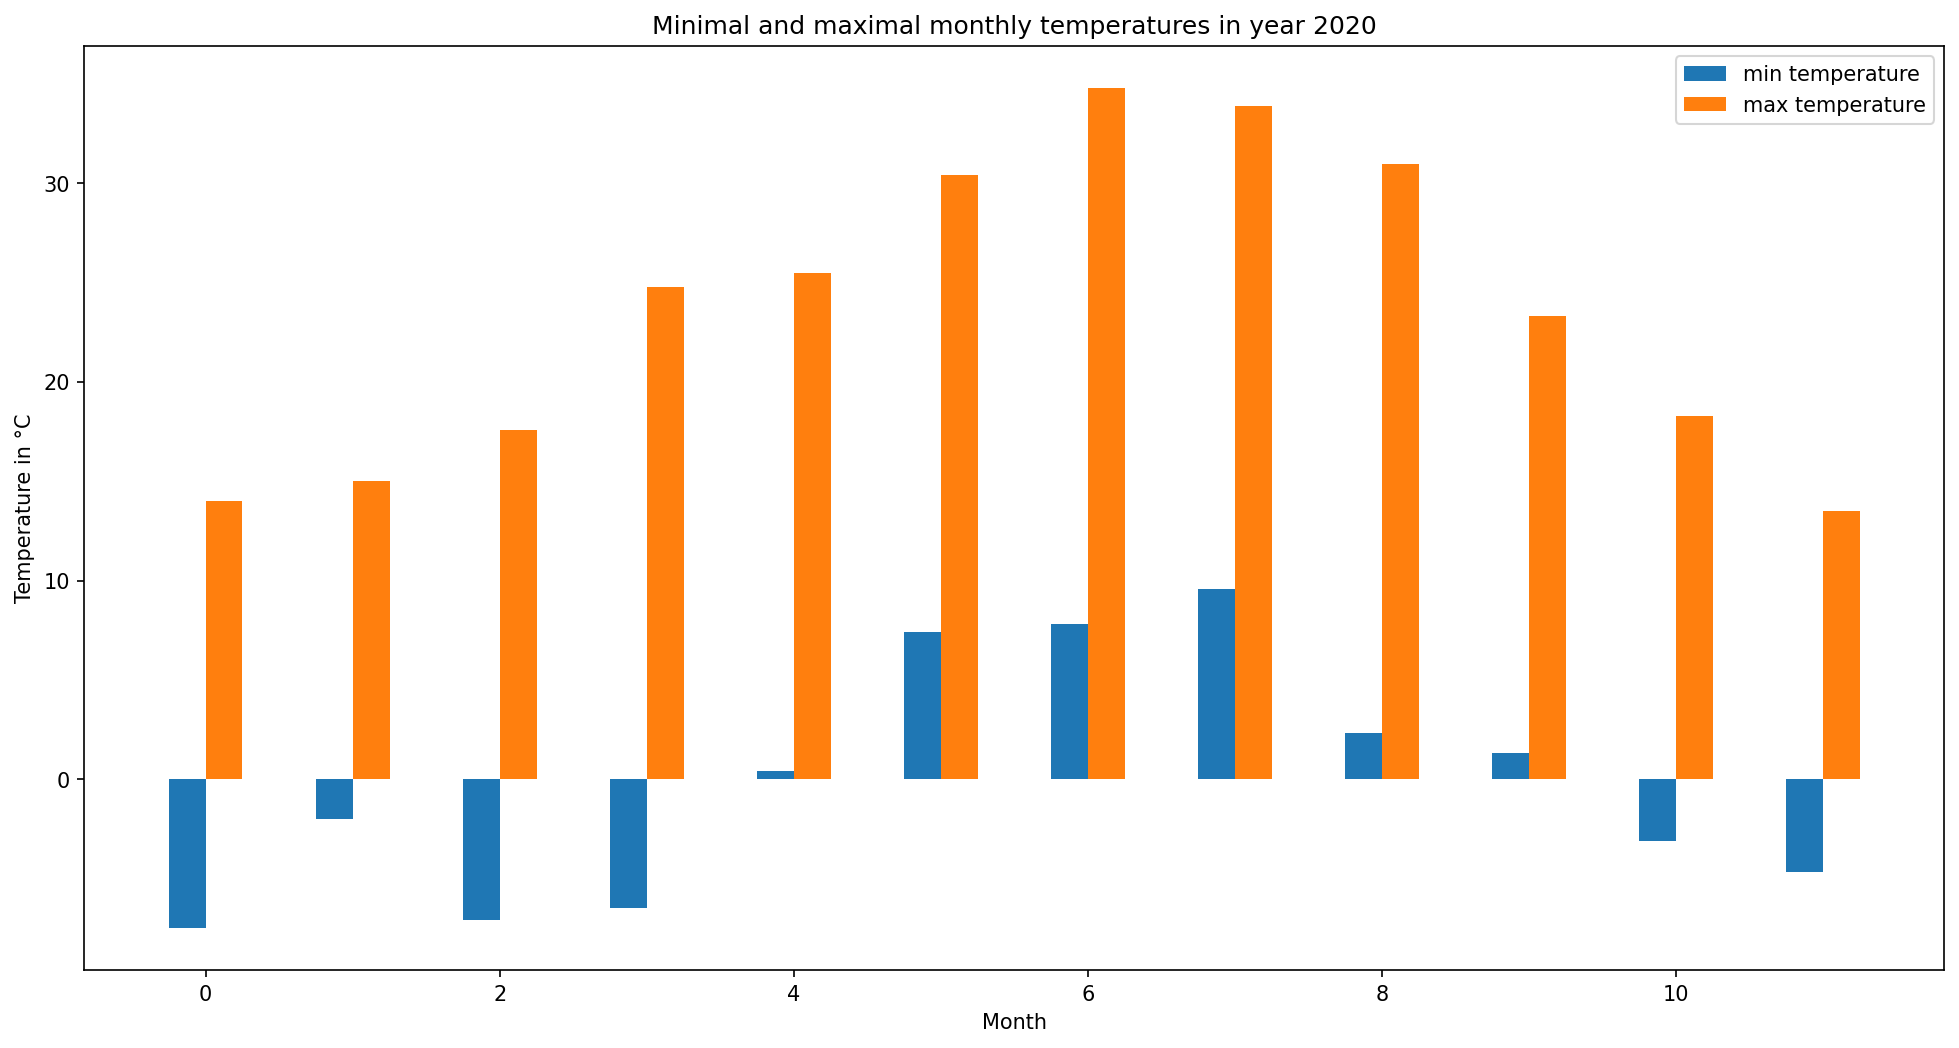

In [12]:
x = np.arange(len(min_temps))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16,8))

# matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)
rects1 = ax.bar(x - width/2, min_temps, width, label='min temperature')
rects2 = ax.bar(x + width/2, max_temps, width, label='max temperature')

ax.set_ylabel('Temperature in °C')
ax.set_xlabel('Month')
ax.set_title('Minimal and maximal monthly temperatures in year 2020')
ax.legend();

Podařilo se nám vytvořit korektní graf, který má nadpis, legendu a popsané osy. Přesto vypadá poněkud zvláštně a těžko se chápe. Co můžeme udělat, abychom ho vylepšili?

Podobně jako v předchozím příkladu můžeme maximální teplotu zobrazovat červenou barvou a minimální modrou. Problém s těžkým odhadem teploty jsme minule vyřešili použitím mřížky, nyní můžeme zkusit vypsat hodnotu nad (resp. pod) každý sloupec. Poslední zlepšení je specifické pro tento případ. Jednotlivé sloupce začínají vždy od nuly a rostou vzhůru, pokud je výsledná hodnota kladná, nebo dolů, pokud je záporná. Dává proto smysl osu x posunout právě na tento zlom. Také by bylo vhodné na ose x zobrazovat všechny měsíce.

### 😍 Pokus 2

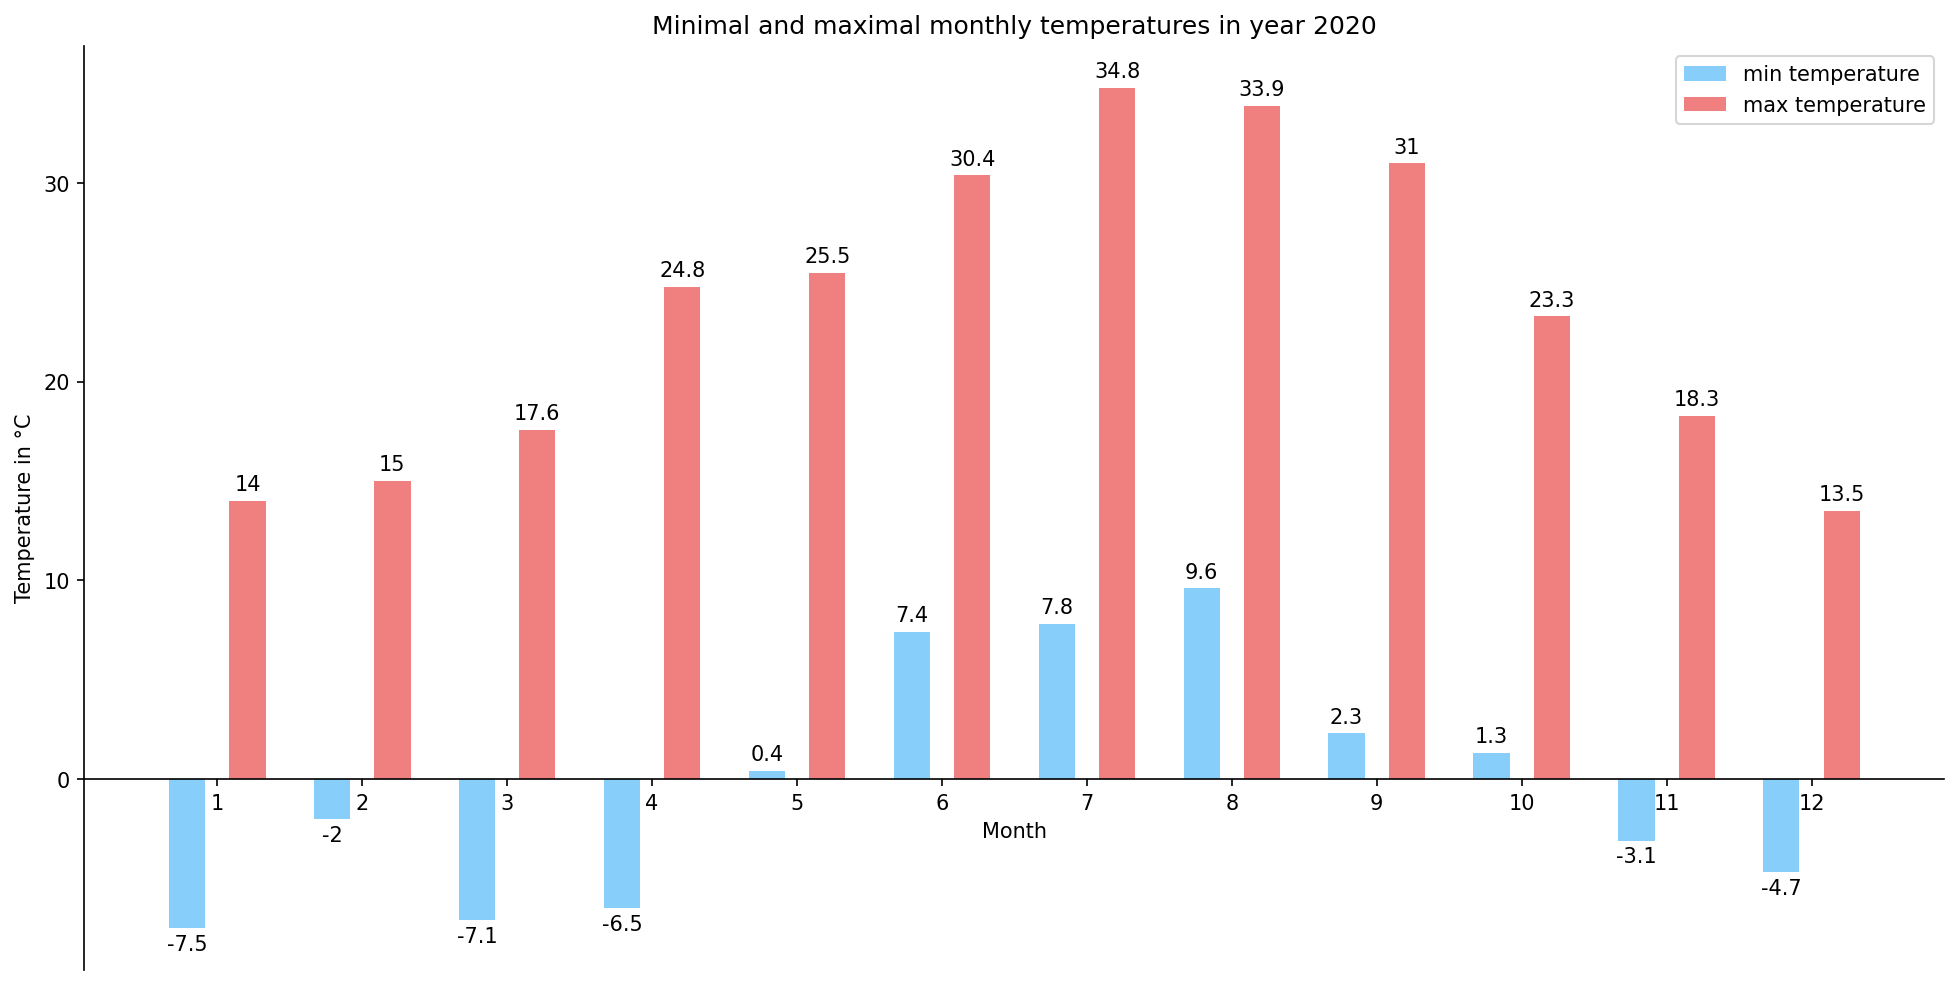

In [13]:
labels = filtered.month.unique()

x = np.arange(len(min_temps))
width = 0.25

fig, ax = plt.subplots(figsize=(16,8))
rects1 = ax.bar(x - width/1.2, min_temps, width, label='min temperature', color='lightskyblue')
rects2 = ax.bar(x + width/1.2, max_temps, width, label='max temperature', color='lightcoral')

ax.set_ylabel('Temperature in °C')
ax.set_xlabel('Month')
ax.set_title('Minimal and maximal monthly temperatures in year 2020')

ax.set_xticks(x, labels)
ax.legend()

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_position('zero')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3);

## ☝️ Rozpad dnů do tří teplotních kategorií
Jako poslední příklad si ukážeme skládaný sloupcový graf (stacked bar chart).

Dny budeme dělit do tří kategorií:
* cold - dny s průměrnou teplotou <= 10
* medium - dny s průměrnou teplotou > 10 a <= 20
* hot - ostatní

Takto vypadá funkce, která nám podle průměrné hodnoty den zařadí do jedné z kategorií.

In [14]:
def classify_temperature(row):
    if row['avg temperature'] <= 10:
        return 'cold'
    elif row['avg temperature'] <= 20:
        return 'medium'
    else:
        return 'hot'

Budeme vizualizovat počet dní patřících do každé ze tří kategorií. Zaměříme se jen na měsíc květen v průběhu let 2000 až 2020.

Filtrace dat je oproti minulým příkladům poněkud komplikovanější. Pokud se ztrácíte, podívejte se na cvičení na pandas, všechno tam je vysvětleno.

Pokud vás zajímá, proč jsme na prvním řádku použili .copy(), můžete se podívat [zde](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy).

In [15]:
filtered = df[(df.year.isin(range(2000, 2021))) & (df.month == 5)].copy().dropna()
filtered['temp class'] = filtered.apply(classify_temperature, axis=1)

grouped = filtered.groupby(['year','temp class']).size()

temp_df = grouped.unstack(1).fillna(0)
temp_df

temp class,cold,hot,medium
year,,,
2000,1.0,6.0,24.0
2001,2.0,2.0,27.0
2002,0.0,1.0,30.0
2003,1.0,3.0,27.0
2004,4.0,0.0,27.0
2005,8.0,6.0,17.0
2006,2.0,0.0,29.0
2007,2.0,10.0,19.0
2008,3.0,3.0,25.0


### 🙂 Pokus 1

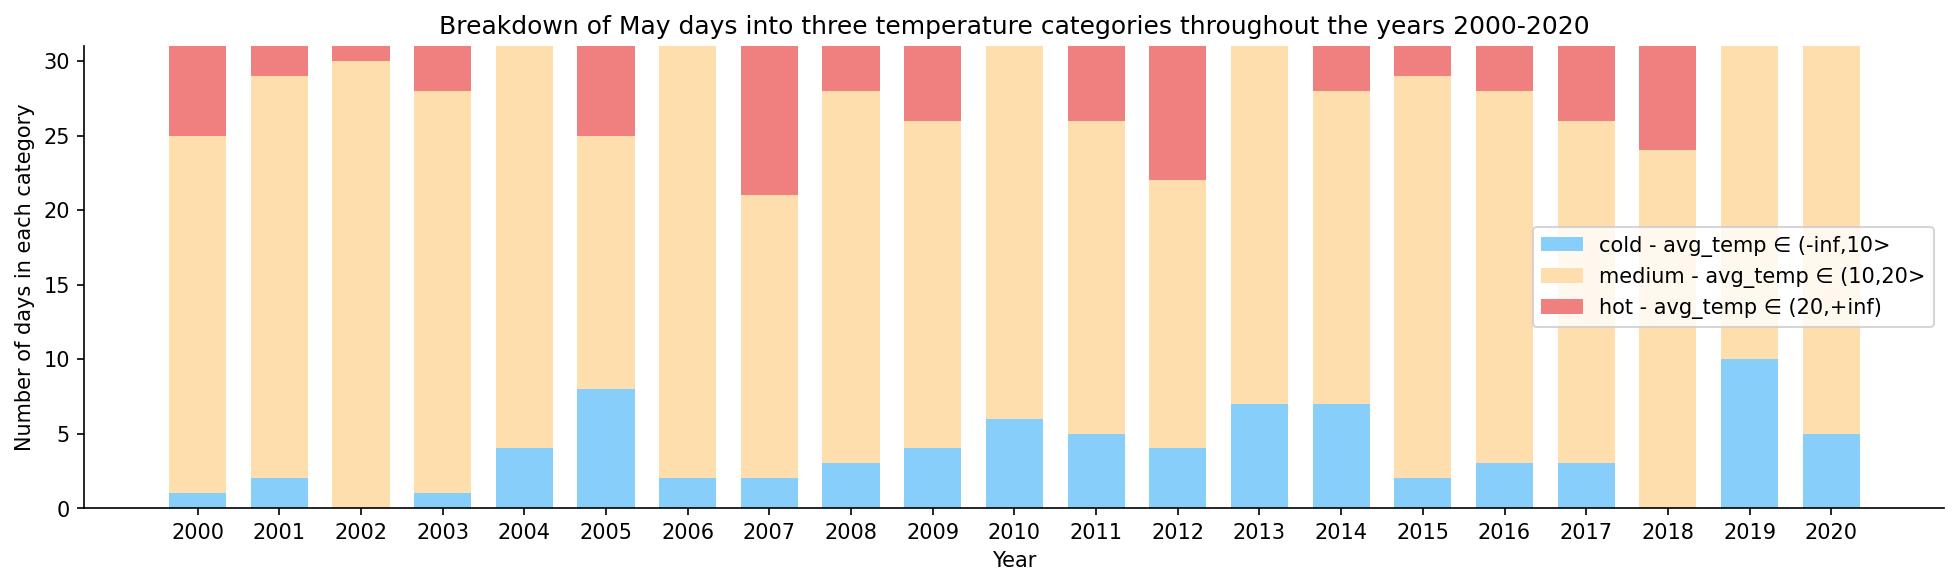

In [16]:
fig, ax = plt.subplots(figsize=(16,4)) 

cold = temp_df.iloc[:,0]
medium = temp_df.iloc[:,2]
hot = temp_df.iloc[:,1]
labels = np.array(range(2000, 2021))

fmt=ticker.FixedLocator(labels) 
ax.xaxis.set_major_locator(fmt)

ax.bar(labels, cold, width=0.7, align='center', bottom=0, color='lightskyblue', label='cold - avg_temp ∈ (-inf,10>')
ax.bar(labels, medium, width=0.7, align='center', bottom=cold, color='navajowhite', label='medium - avg_temp ∈ (10,20>')
ax.bar(labels, hot, width=0.7, align='center', bottom=cold+medium, color='lightcoral', label='hot - avg_temp ∈ (20,+inf)')

ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False)

ax.set_ylabel('Number of days in each category')
ax.set_xlabel('Year')
ax.set_title('Breakdown of May days into three temperature categories throughout the years 2000-2020')
ax.legend();

⭐️ **Vaše domácí aktivita:** ⭐️ Zkuste poslední úlohu vizualizovat i jiným způsobem. Svůj graf můžete odevzdat emailem vyučující a na další přednášce můžeme hlasovat o nejlepší výtvor (z několika vybraných, pokud se jich sejde příliš mnoho). 🥳

In [17]:
# TODO - zde je prostor pro váš kód

# 🎉 A to je vše! 🎉 